In [1]:
import torch
import pandas as pd
from tqdm.notebook import trange, tqdm

torch.cuda.is_available()

True

In [2]:
# TDQ is a A Fast, Extensible Progress Bar for Python and CLI
#  testing progrress bar of TQQDM
for i in trange(5):
    print(i)

  0%|          | 0/5 [00:00<?, ?it/s]

0
1
2
3
4


#  Read_CSV 

In [3]:
df = pd.read_csv('BTC_tweets_daily_example.csv')
df.columns

Index(['Unnamed: 0', 'Date', 'Tweet', 'Screen_name', 'Source', 'Link',
       'Sentiment', 'sent_score', 'New_Sentiment_Score',
       'New_Sentiment_State'],
      dtype='object')

# Preprocessing

##  Utils fuunctions

In [4]:
def count_digit(num):
    count = 0
    while num != 0:
        num //= 10
        count += 1
    return count

def check_shape(df):
    rows, cols = df.shape
    print("\nNumber or rows in dataset: {}".format(rows))
    print("==========================={}".format(count_digit(rows)*'='))
    print("\nNumber or columns in dataset: {}".format(cols))
    print("=============================={}".format(count_digit(cols)*'='))

##  rename columns

In [5]:
# renamme colummn
df.rename(columns = {'Unnamed: 0':'id'}, inplace = True)
df = df[['id', 'Tweet', 'Sentiment']]
# check the numbber of rows and   coolumnss in datasset
check_shape(df)
df.head()


Number or rows in dataset: 50873

Number or columns in dataset: 3


,id,Tweet,Sentiment
0,0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral']
1,1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral']
2,2,RT @tippereconomy: Another use case for #block...,['positive']
3,3,free coins https://t.co/DiuoePJdap,['positive']
4,4,RT @payvxofficial: WE are happy to announce th...,['positive']


## rename calss names

In [6]:
class_dict = {"['neutral']": 'neutral', "['positive']": 'positive', "['negative']": 'negative'}
df['Sentiment'] = df.Sentiment.replace(class_dict)
df.head()

,id,Tweet,Sentiment
0,0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",neutral
1,1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,neutral
2,2,RT @tippereconomy: Another use case for #block...,positive
3,3,free coins https://t.co/DiuoePJdap,positive
4,4,RT @payvxofficial: WE are happy to announce th...,positive


## remove nan and empty rows

In [7]:
df = df[df['Sentiment'] != '0.0']
check_shape(df)
df = df[df.Sentiment.notnull()]
check_shape(df)


Number or rows in dataset: 50866

Number or columns in dataset: 3

Number or rows in dataset: 50852

Number or columns in dataset: 3


## Extract  number of classes aand their count

In [8]:
classes = list(df.Sentiment.unique())
possible_labels = df.Sentiment.unique()
print("\nNummber of classes in dataset: {}".format(len(classes)))
print("==============================={}".format(count_digit(len(classes))*'='))
print("\nName of the classes")
print("===================\n")
print(classes,"\n")


Nummber of classes in dataset: 3

Name of the classes

['neutral', 'positive', 'negative'] 



In [9]:
classes_counts = df.Sentiment.value_counts()
print("\nclasses counts")
print("==============\n")
print(classes_counts)


classes counts

positive    22937
neutral     21932
negative     5983
Name: Sentiment, dtype: int64


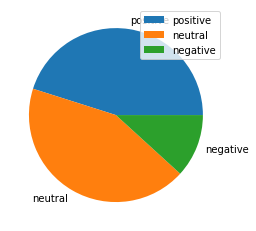

In [10]:
# display classes count
import matplotlib.pyplot as plt
import numpy as np

values = np.array(classes_counts)
mylabels = list(classes_counts.index)

plt.pie(values, labels = mylabels)
plt.legend()
plt.show() 

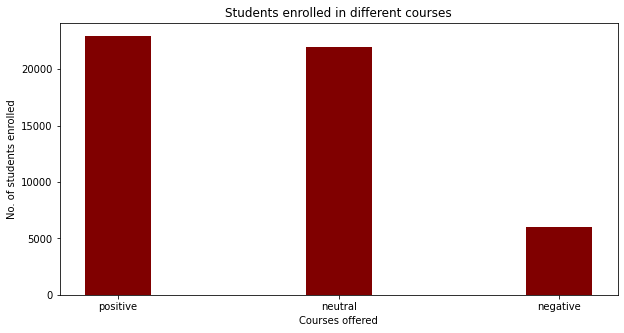

In [11]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(mylabels, values, color ='maroon', width=0.3)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

## Label Encoding

In [12]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label]= index
label_dict

{'neutral': 0, 'positive': 1, 'negative': 2}

In [13]:
df['label'] = df.Sentiment.replace(label_dict)
df.head()

,id,Tweet,Sentiment,label
0,0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",neutral,0
1,1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,neutral,0
2,2,RT @tippereconomy: Another use case for #block...,positive,1
3,3,free coins https://t.co/DiuoePJdap,positive,1
4,4,RT @payvxofficial: WE are happy to announce th...,positive,1


# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(
    df,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)

print("\nTraining Set:")
check_shape(train)
print("\nTesting Set:")
check_shape(val)


Training Set:

Number or rows in dataset: 43224

Number or columns in dataset: 4

Testing Set:

Number or rows in dataset: 7628

Number or columns in dataset: 4


In [15]:
print("\nTraining Data:")
print("=============")
train.head()


Training Data:


,id,Tweet,Sentiment,label
40003,39999,Name: WaBi\nSymbol: WABI\n24 hour change: -4.1...,negative,2
22660,22656,RT @FreeZone_one: Freezone will change your li...,neutral,0
170,170,RT @nfrisbie83: OK Internet... I need your hel...,positive,1
44649,44645,RT @nfrisbie83: OK Internet... I need your hel...,positive,1
36573,36569,get it @bethereumteam #bethereum #BountyCampai...,neutral,0


In [16]:
print("\nTesting Data:")
print("=============")
val.head()


Testing Data:


,id,Tweet,Sentiment,label
42486,42482,TSX Group Subsidiary to Launch Cryptocurrency ...,neutral,0
26517,26513,@Pinboard I think of Jack as a trend-chaser - ...,positive,1
6544,6544,RT @bit_rent: I just published “While Bitcoin ...,positive,1
39924,39920,Monthly Web Traffic for Major Bitcoin Exchange...,negative,2
42309,42305,"""Bitcoin Price Technical Analysis for 03/23/20...",neutral,0


# Download and Initialize BERT Tokenizer

In [17]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case=True
)

2022-05-16 15:33:28.759723: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [18]:
encoded_data_train = tokenizer.batch_encode_plus(
    train.Tweet.values,
    add_special_tokens=True,
    return_attention_mask=True,
    #pad_to_max_length=True,
    padding=True,
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    val.Tweet.values,
    add_special_tokens=True,
    return_attention_mask=True,
    #pad_to_max_length=True,
    padding=True,
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

In [19]:
# for training data
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train.label.values)

# for testing data
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val.label.values) 

## create train val data tensor

In [20]:
# It is created the TensorDataset adapted to Bert for the train and validation
dataset_train = TensorDataset(
    input_ids_train,
    attention_masks_train,
    labels_train
)

dataset_val = TensorDataset(input_ids_val,
                            attention_masks_val,
                            labels_val
)

print(len(dataset_train))
print(len(dataset_val))

43224
7628


# Setting up BERT Pretrained Model

In [21]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
     num_labels=len(label_dict),
     output_attentions=False,
     output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## Creating Data Loaders

In [32]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 64 #32

dataloader_train = DataLoader(
    dataset_train,
    sampler=RandomSampler(dataset_train),
    batch_size=batch_size
)


dataloader_val = DataLoader(
    dataset_val,
    sampler=SequentialSampler(dataset_val),
    batch_size=batch_size 
)

## Setting Up Optimizer and Scheduler

In [33]:
from transformers import AdamW, get_linear_schedule_with_warmup

epochs = 10

optimizer = AdamW(
    model.parameters(),
    lr=1e-5, #2e-5 > 5e-5
    eps=1e-8
)

scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=len(dataloader_train)*epochs
)

## Defining our Performance Metrics

Accuracy metric approach originally used in accuracy function in this tutorial.

In [34]:
import numpy as np
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis =1 ).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')


def accuracy_per_class(preds, labels):
    label_dict_inverse={v: k for k, v in label_dict.items()}
    preds_flat = np.argmax(preds, axis =1 ).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_pred = preds_flat[labels_flat== label]
        y_true = labels_flat[labels_flat== label]
        print(f'Class:{label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_pred[y_pred==label])}/{len(y_true)}\n')

## Creating Training Loop

In [35]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [36]:
def evaluate(dataloader_val):
    model.eval()
    loss_val_total = 0
    predictions, true_vals = [], []
    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val) 

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [37]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch),
                        leave=False,
                        disable=False)
    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs ={
            'input_ids'    :batch[0],
            'attention_mask':batch[1],
            'labels'        :batch[2]
        }
        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()                     
        loss.backward()
    
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        progress_bar.set_postfix(
            {'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
        
    #torch.save(model.state_dict(),f'Models/BERT_ft_epoch{epoch}.model')
    tqdm.write(f'\nEpoch {epoch} Results:')
    
    loss_train_avg= loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss:{loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1= f1_score_func(predictions,true_vals)
    tqdm.write(f'Validation loss  {val_loss}')
    tqdm.write(f'F1 Score (weigthed): {val_f1}')
    print("****************************")
torch.save(model.state_dict(),f'Models/BERT_ft_epoch{epoch}.model') 

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 1 Results:
Training loss:0.08642142035856501


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.0857979363509609
F1 Score (weigthed): 0.9770828370856895
****************************


Epoch 2:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 2 Results:
Training loss:0.043499045361063485


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.06726246064063161
F1 Score (weigthed): 0.9838432116315363
****************************


Epoch 3:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 3 Results:
Training loss:0.026553207553252193


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.07195456878980622
F1 Score (weigthed): 0.9841510551288252
****************************


Epoch 4:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 4 Results:
Training loss:0.015070661694309455


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.08619776410681274
F1 Score (weigthed): 0.9836299559404211
****************************


Epoch 5:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 5 Results:
Training loss:0.011076207399025928


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.08477503157967779
F1 Score (weigthed): 0.9845293109808047
****************************


Epoch 6:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 6 Results:
Training loss:0.0072196017390955035


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.08151692313452562
F1 Score (weigthed): 0.986478081037656
****************************


Epoch 7:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 7 Results:
Training loss:0.0045453176041556995


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.08424520220026656
F1 Score (weigthed): 0.9855643960670716
****************************


Epoch 8:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 8 Results:
Training loss:0.004113345402934828


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.09077505882335875
F1 Score (weigthed): 0.9862139203745884
****************************


Epoch 9:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 9 Results:
Training loss:0.0023257000827293026


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.09566320849074449
F1 Score (weigthed): 0.9850374306925874
****************************


Epoch 10:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 10 Results:
Training loss:0.0012434988643986293


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.09439605041425239
F1 Score (weigthed): 0.9847805761270005
****************************


FileNotFoundError: [Errno 2] No such file or directory: 'Models/BERT_ft_epoch10.model'

# Model Validation
## load base model

In [39]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_dict),
    output_attentions=False,
    output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## load trained weights

In [40]:
PATH='./Models/BERT_ft_epoch10.model'
model.load_state_dict(torch.load(PATH, 
                                 map_location=torch.device('cuda:0')))

<All keys matched successfully>

## make predictions

In [44]:
device = torch.device('cuda')
pass

In [45]:
model.to(device)
pass

In [46]:


_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/120 [00:00<?, ?it/s]

## compile results

In [47]:
accuracy_per_class(predictions, true_vals)

Class:neutral
Accuracy:3240/3290

Class:positive
Accuracy:3411/3441

Class:negative
Accuracy:861/897

